In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/779914/make_it_easy.csv')

In [ ]:
result = df.copy()

R = lambda x: (x.feature_1**2 + x.feature_2**2)**0.5
result['killer_feature'] = result.apply(R, axis=1)

In [ ]:
result

,feature_1,feature_2,feature_3,label,killer_feature
0,2.5,0.00,58,B,2.500000
1,2.5,0.02,61,B,2.500080
2,2.5,0.05,33,B,2.500500
3,2.5,0.07,89,B,2.500980
4,2.5,0.10,58,B,2.501999
...,...,...,...,...,...
1253,2.0,-0.09,30,A,2.002024
1254,2.0,-0.07,41,A,2.001225
1255,2.0,-0.05,30,A,2.000625
1256,2.0,-0.03,3,A,2.000225


In [ ]:
df.head()

,feature_1,feature_2,feature_3,label
0,2.5,0.00,58,B
1,2.5,0.02,61,B
2,2.5,0.05,33,B
3,2.5,0.07,89,B
4,2.5,0.10,58,B


In [ ]:
df.describe()

,feature_1,feature_2,feature_3
count,1258.000000,1258.000000,1258.000000
mean,0.002432,-0.000199,50.675676
std,1.602289,1.600537,28.462619
min,-2.500000,-2.500000,0.000000
25%,-1.560000,-1.560000,26.000000
50%,0.000000,0.000000,50.000000
75%,1.567500,1.560000,75.750000
max,2.500000,2.500000,99.000000


In [ ]:
df.label.unique()

array(['B', 'A'], dtype=object)

In [ ]:
df

,feature_1,feature_2,feature_3,label
0,2.5,0.00,58,B
1,2.5,0.02,61,B
2,2.5,0.05,33,B
3,2.5,0.07,89,B
4,2.5,0.10,58,B
...,...,...,...,...
1253,2.0,-0.09,30,A
1254,2.0,-0.07,41,A
1255,2.0,-0.05,30,A
1256,2.0,-0.03,3,A


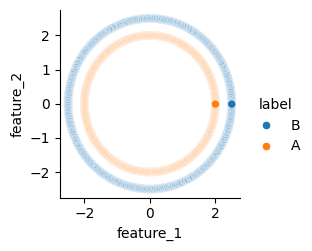

In [ ]:
sns.pairplot(data=df, x_vars='feature_1', y_vars='feature_2', hue='label')
plt.show()

In [ ]:
def dfc(x):
  return (x.feature_1**2 + x.feature_2**2)**0.5

In [ ]:
df['R'] = df.apply(dfc, axis=1)

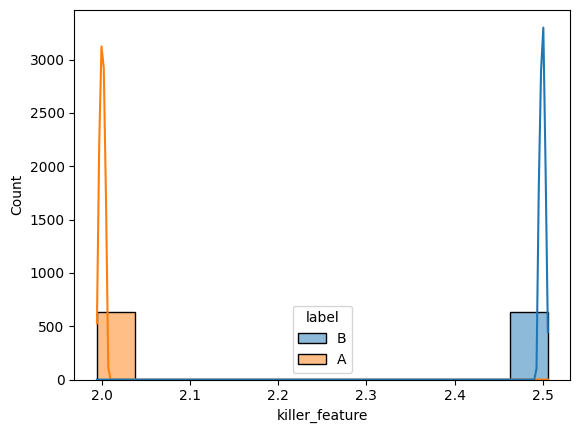

In [ ]:
sns.histplot(data=result, x='killer_feature', hue='label', kde=True)
plt.show()

In [ ]:
import numpy as np

In [ ]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/779914/make_gold_features_example.csv')

In [ ]:
df.head()

,deviation_normal,ride_date,car_id,value,diff_value
0,0,01-01,G115,-1.5,0.0
1,-5,01-02,G115,-6.0,0.0
2,-6,01-03,G115,-6.0,0.0
3,-4,01-04,G115,-4.5,0.0
4,-5,01-05,G115,-3.5,0.0


In [ ]:
df = df.groupby(['car_id', 'ride_date'], as_index=False)['deviation_normal'].agg('mean')

In [ ]:
df.head()

,car_id,ride_date,deviation_normal
0,G-29,01-01,2.0
1,G-29,01-02,-1.0
2,G-29,01-03,0.0
3,G-29,01-04,-1.0
4,G-29,01-05,0.0


In [ ]:
df["diff_value"] = df.groupby("car_id", as_index=False)["deviation_normal"].transform(pd.Series.diff)
df["diff_value"] = df["diff_value"].apply(lambda x: x if x >= 5 else 0)

In [ ]:
result = df.groupby('car_id', as_index=False)['diff_value'].agg('max')

In [ ]:
result.head()

,car_id,diff_value
0,G-29,11.0
1,G115,52.0
2,M-30,8.0
3,b468,0.0
4,d-21,0.0


In [ ]:
find_pos = lambda x: np.argmax(df[df['car_id'] == x['car_id']]['diff_value'])

In [ ]:
result['pos'] = result.apply(find_pos, axis=1)

In [ ]:
result.head()

,car_id,diff_value,pos
0,G-29,11.0,50
1,G115,52.0,49
2,M-30,8.0,51
3,b468,0.0,0
4,d-21,0.0,0


In [ ]:
result = result.rename(columns={'diff_value': 'gold_feature_1', 'pos': 'gold_feature_2'})

In [ ]:
result.head()

,car_id,feature_1,feature_2
0,G-29,11.0,50
1,G115,52.0,49
2,M-30,8.0,51
3,b468,0.0,0
4,d-21,0.0,0


In [ ]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/779915/fs_task2_22f.csv')

In [ ]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target_reg,target_class
0,0,4.101552,173,1,3.405865,88182,157.168032,1.973071e+07,0,1,...,2015,191.996603,2020,0.1,0,174,9,4.76,57.15,engine_ignition
1,0,4.303506,173,1,-2.218952,86897,121.805143,1.594185e+07,0,0,...,2015,193.547718,2015,0.1,1,174,7,4.26,60.82,engine_ignition
2,0,4.246379,174,1,-3.740321,44604,175.889164,2.127630e+07,0,0,...,2013,177.922027,2019,0.1,1,174,6,5.98,46.51,engine_ignition
3,0,4.342874,172,1,3.139031,114610,151.653445,2.250440e+07,0,0,...,2017,110.165268,2016,0.7,1,174,20,4.42,30.71,gear_stick
4,1,4.140287,148,0,-4.022916,114851,159.547387,1.163474e+07,0,0,...,2017,190.915943,2020,0.1,0,174,25,4.28,59.18,engine_fuel


In [ ]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target_reg,target_class
0,0,4.101552,173,1,3.405865,88182,157.168032,1.973071e+07,0,1,...,2015,191.996603,2020,0.1,0,174,9,4.76,57.15,engine_ignition
1,0,4.303506,173,1,-2.218952,86897,121.805143,1.594185e+07,0,0,...,2015,193.547718,2015,0.1,1,174,7,4.26,60.82,engine_ignition
2,0,4.246379,174,1,-3.740321,44604,175.889164,2.127630e+07,0,0,...,2013,177.922027,2019,0.1,1,174,6,5.98,46.51,engine_ignition
3,0,4.342874,172,1,3.139031,114610,151.653445,2.250440e+07,0,0,...,2017,110.165268,2016,0.7,1,174,20,4.42,30.71,gear_stick
4,1,4.140287,148,0,-4.022916,114851,159.547387,1.163474e+07,0,0,...,2017,190.915943,2020,0.1,0,174,25,4.28,59.18,engine_fuel


In [ ]:
cat_cols = ['feature_0', 'feature_3', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_16', 'feature_18']

In [ ]:
!pip install catboost

In [ ]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor, Pool, CatBoostClassifier
import numpy as np


In [ ]:
X = df.drop('target', axis=1)
y = df.target.fillna(0)

KeyError: "['target'] not found in axis"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = CatBoostClassifier(random_state=42,
                           thread_count=-1)
model.fit(X_train, y_train,
          eval_set=(X_test, y_test),
          verbose=100, plot=False,
          early_stopping_rounds=100)

Learning rate set to 0.10885
0:	learn: 1.9397215	test: 1.9473294	best: 1.9473294 (0)	total: 128ms	remaining: 2m 7s
100:	learn: 0.4678663	test: 0.6483020	best: 0.6483020 (100)	total: 2.13s	remaining: 18.9s
200:	learn: 0.3304501	test: 0.6373796	best: 0.6366906 (199)	total: 3.31s	remaining: 13.2s
300:	learn: 0.2467960	test: 0.6428317	best: 0.6361299 (254)	total: 4.51s	remaining: 10.5s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6361299133
bestIteration = 254

Shrink model to first 255 iterations.


In [ ]:
fi = model.get_feature_importance(prettified=True)
fi

,Feature Id,Importances
0,feature_1,32.490151
1,feature_9,29.112944
2,feature_8,12.172454
3,feature_2,4.631686
4,feature_6,4.100450
5,feature_7,3.807930
6,feature_5,3.795735
7,feature_4,3.491490
8,feature_3,3.473900
9,feature_0,2.923259


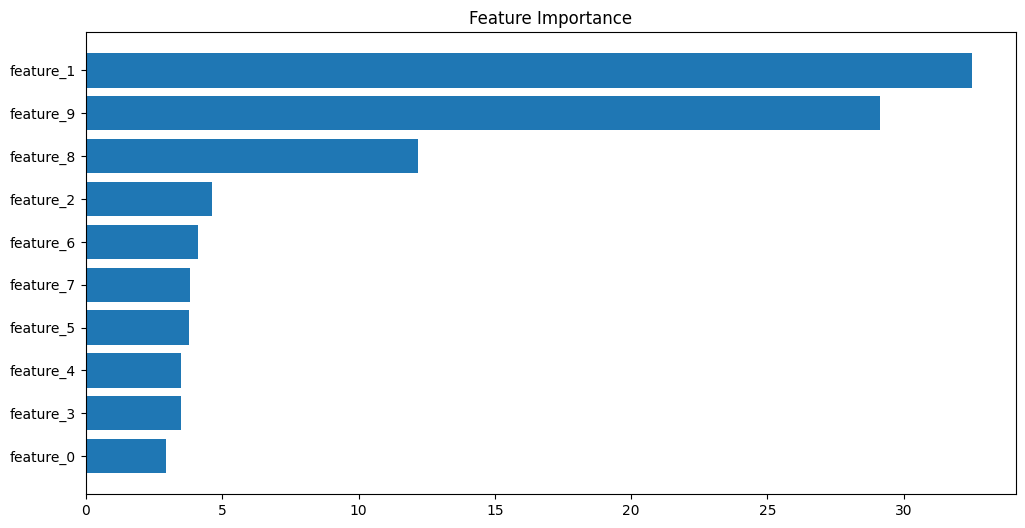

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Feature Importance');

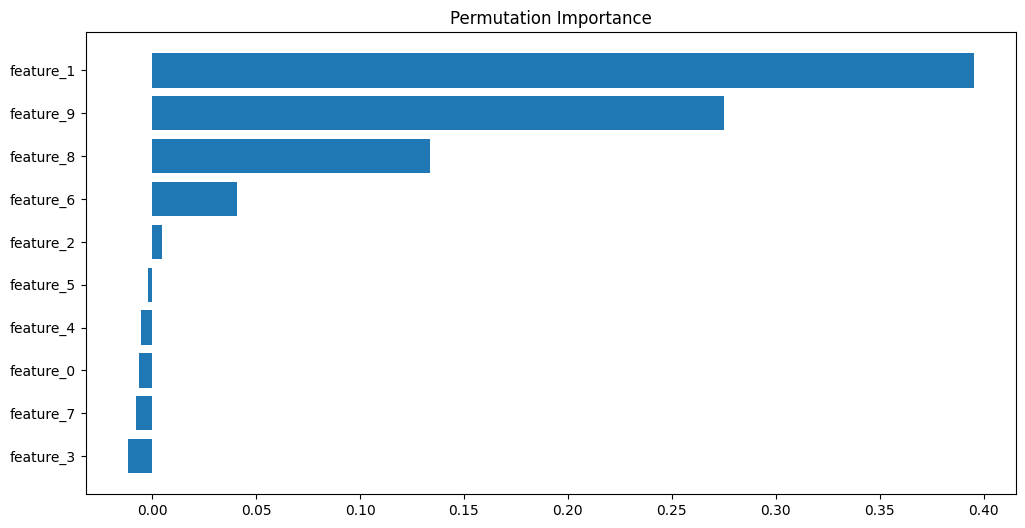

In [ ]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Permutation Importance');

In [ ]:
perm_importance.importances_mean.argsort()

array([3, 7, 0, 4, 5, 2, 6, 8, 9, 1])

In [ ]:
!pip install phik -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 7.7 MB/s eta 0:00:00


In [ ]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

interval columns not set, guessing: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'target_reg']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable feature_17 for analysis 1. Dropping this column
  warnings.warn(


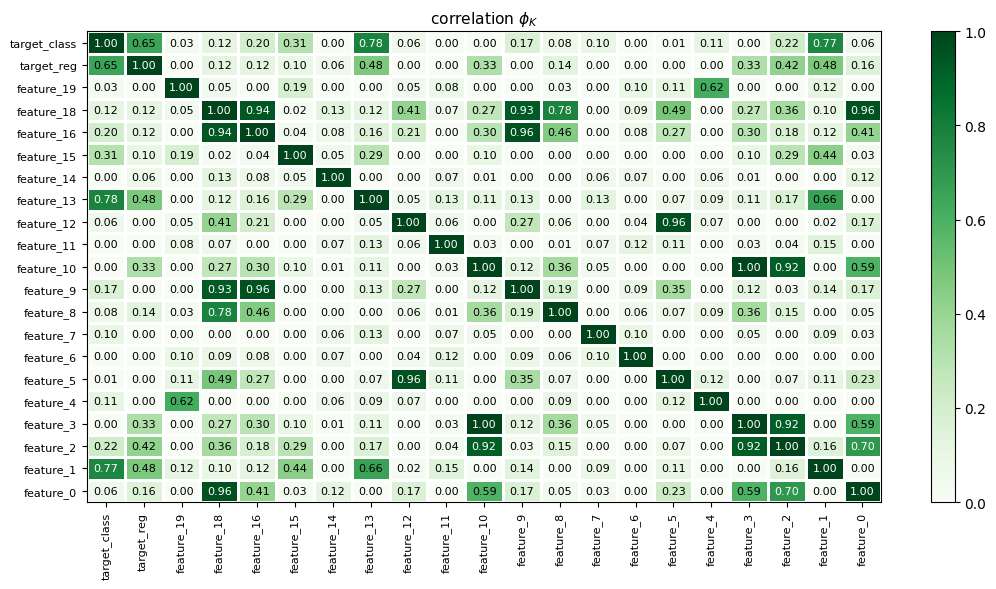

In [ ]:
phik_overview = df.phik_matrix().round(2)

plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=0.8, figsize=(11, 6))
plt.tight_layout()

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 7.0 MB/s eta 0:00:00


In [ ]:
import shap

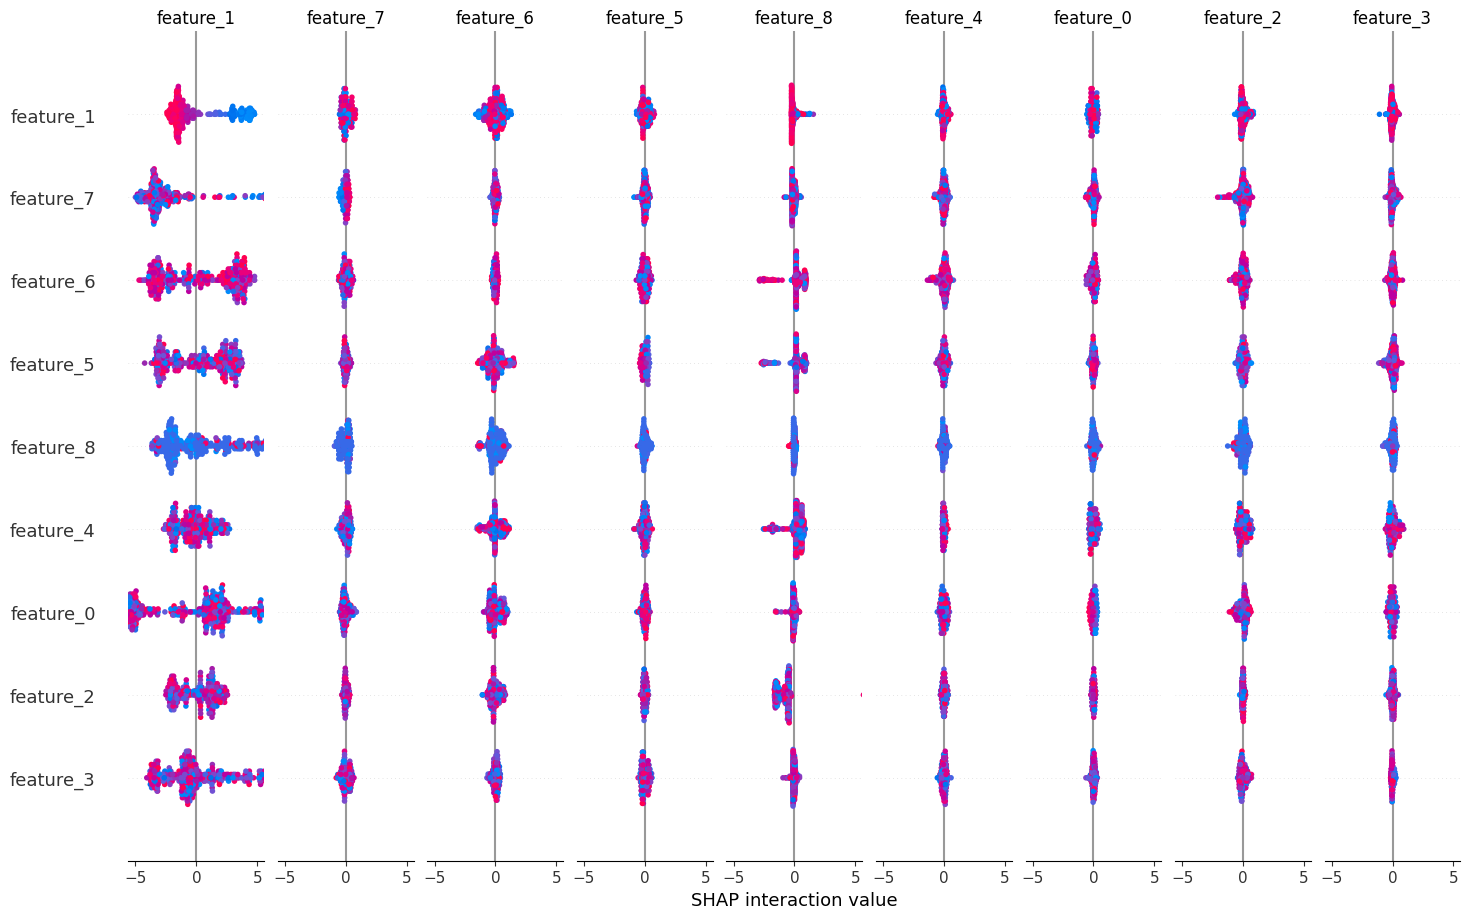

In [ ]:
# Посмотрим на SHAP values
explainer = shap.TreeExplainer(model)

val_dataset = Pool(data=X_test, label=y_test)
shap_values = explainer.shap_values(val_dataset)
shap.summary_plot(shap_values, X_test, max_display = 25)

In [1]:
!pip install lightgbm==3.3.5

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import lightgbm as lgb

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_train.csv")

In [4]:
data.head()

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,35.20,electro_bug
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,38.62,gear_stick
3,u29695600e,Mercedes-Benz GLC,business,petrol,4.04,2011,1263,2020,30.34,engine_fuel
4,N-8915870N,Renault Sandero,standart,petrol,4.70,2012,26428,2017,30.45,engine_fuel


In [5]:
X = data.riders
y = data.target_reg

In [6]:
# предикты получаем методом get_label()
def custom_l2_loss(y, data):
    t = data.get_label()
    # YOUR CODE HERE ...
    return grad, hess

def custom_l2_eval(y, data):
    t = data.get_label()
    # YOUR CODE HERE ...
    return 'l2', ###, ###

In [10]:
def custom_l2_loss(y_true, y_pred):
    t = data.get_label()
    gradient = y_pred - y_true
    # Рассчитываем значения функции потерь
    loss = 0.5 * np.square(gradient)
    return gradient, loss

In [11]:
def custom_l2_eval(y_true, y_pred):
    loss_value = 0.5 * np.mean(np.square(y_pred - y_true))
    is_higher_better = False
    return 'custom_eval', loss_value, is_higher_better

In [ ]:
def custom_l2_loss(y, data):
    t = data.get_label()
    grad = y - t
    hess = 0.5 * (grad ** 0.5)
    return grad, hess

def custom_l2_eval(y, data):
    t = data.get_label()
    loss = 0.5 * np.square(y - t).mean()
    return 'l2', False

In [12]:
lgbm_params = {
    'random_seed': 42
    }

model = lgb.train(lgbm_params,
                  lgb.Dataset(X, y),
                  fobj=custom_l2_loss,
                  feval=custom_l2_eval)

TypeError: Cannot initialize Dataset from Series